<a href="https://colab.research.google.com/github/Godwin-Anku/earthquake_project/blob/main/Deep_Learning_(Linear_Regression_Modeling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing

import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
SEED_VALUE = 42
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [4]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [6]:
print(f'Training predictor data dimension : {X_train.shape}')
print('\n')
print(f'Training Target feature dimension: {y_train.shape}')
print('\n')
print(f'Testing predictor data dimension: {X_test.shape}')
print('\n')
print(f'Testing Target feature dimension: {y_test.shape}')

print('Input features: ', X_train[0])
print('\n')
print('Target values: ', y_train[0])

Training predictor data dimension : (404, 13)


Training Target feature dimension: (404,)


Testing predictor data dimension: (102, 13)


Testing Target feature dimension: (102,)
Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Target values:  15.2


In [12]:
boston_features = {'Average Number of Rooms': 5}

X_train_1D = X_train[:, boston_features['Average Number of Rooms']]
X_test_1D = X_test[:, boston_features['Average Number of Rooms']]

In [13]:
X_train_1D.shape

(404,)

In [14]:
X_test_1D.shape

(102,)

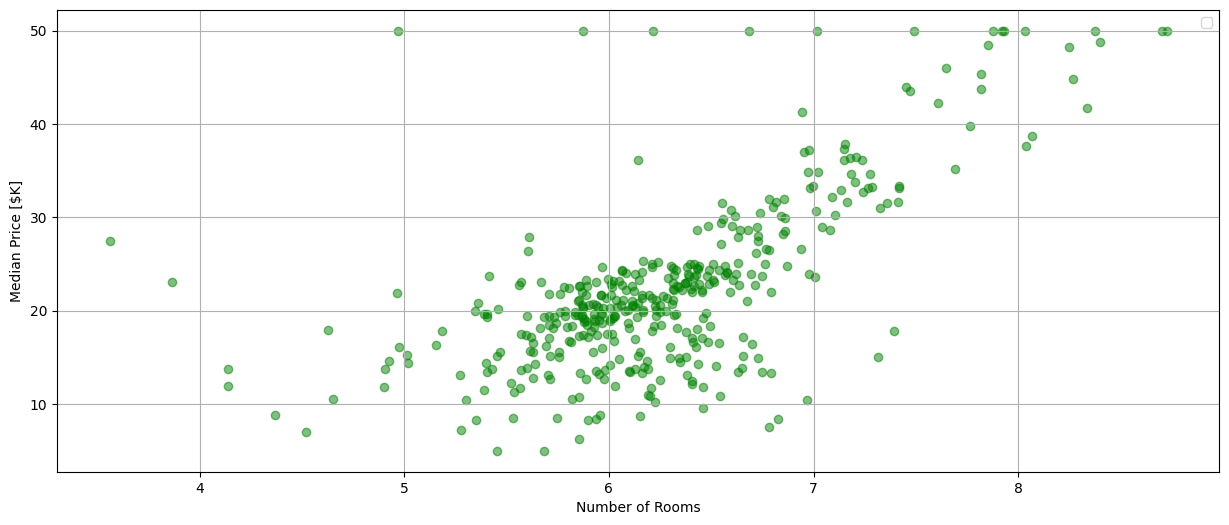

In [17]:
plt.figure(figsize = (15, 6))
plt.xlabel('Number of Rooms')
plt.ylabel('Median Price [$K]')
plt.scatter(X_train_1D, y_train, color = 'green', alpha = 0.5)
plt.grid(True)
plt.legend()

In [19]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (1, )))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.005), loss = 'mae')

In [24]:
history = model.fit(X_train_1D, y_train, batch_size = 16, epochs = 101, validation_split = 0.3)

Epoch 1/101
18/18 [==============================] - 1s 11ms/step - loss: 25.7554 - val_loss: 26.7406
Epoch 2/101
18/18 [==============================] - 0s 3ms/step - loss: 25.0028 - val_loss: 26.0616
Epoch 3/101
18/18 [==============================] - 0s 3ms/step - loss: 24.3388 - val_loss: 25.4053
Epoch 4/101
18/18 [==============================] - 0s 3ms/step - loss: 23.6848 - val_loss: 24.7507
Epoch 5/101
18/18 [==============================] - 0s 4ms/step - loss: 23.0316 - val_loss: 24.0955
Epoch 6/101
18/18 [==============================] - 0s 4ms/step - loss: 22.3784 - val_loss: 23.4414
Epoch 7/101
18/18 [==============================] - 0s 4ms/step - loss: 21.7252 - val_loss: 22.7850
Epoch 8/101
18/18 [==============================] - 0s 4ms/step - loss: 21.0723 - val_loss: 22.1319
Epoch 9/101
18/18 [==============================] - 0s 4ms/step - loss: 20.4189 - val_loss: 21.4764
Epoch 10/101
18/18 [==============================] - 0s 3ms/step - loss: 19.7664 - val_lo

In [39]:
def plot_loss(history):
  plt.figure(figsize = (20, 5))
  plt.plot(history.history['loss'], 'g', label = 'Training Loss')
  plt.plot(history.history['val_loss'], 'b', label = 'Validation Loss')
  plt.xlim([0, 100])
  plt.ylim([0, 30])
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.grid(True)
  plt.legend()

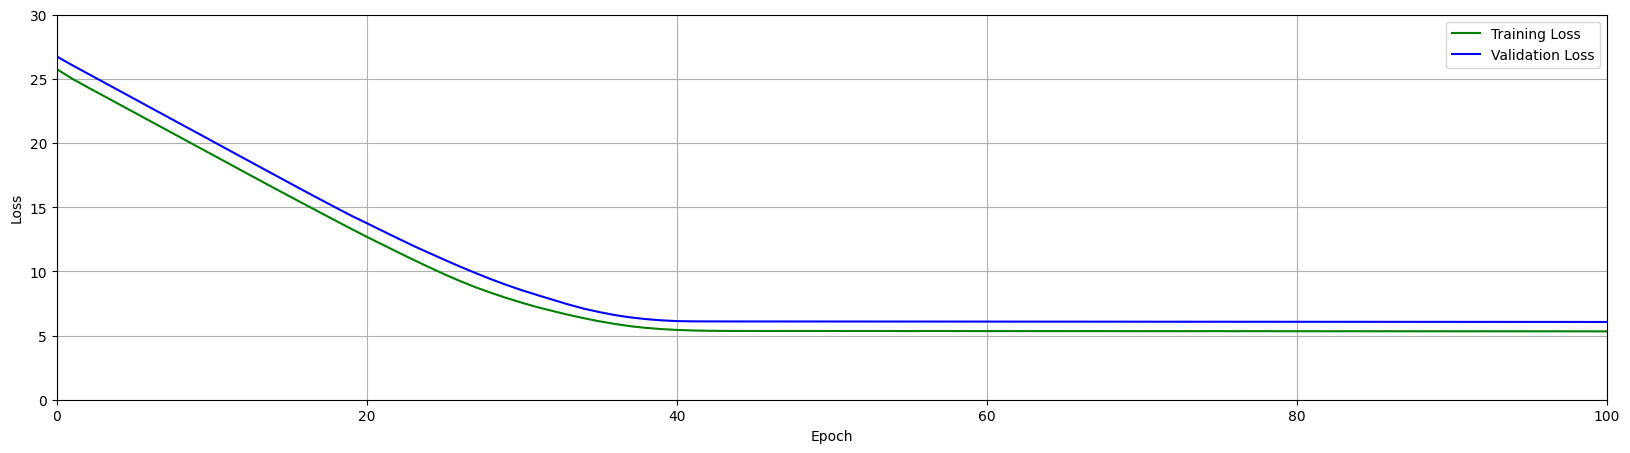

In [40]:
plot_loss(history)

In [46]:
x = [3, 4, 5, 6, 7]
y_predict = model.predict(x)
for i in range(len(x)):
   print(f'Predicted price for a home with {x[i]} rooms: ${int(y_predict[i])}K')

1/1 [==============================] - 0s 51ms/step
Predicted price for a home with 3 rooms: $11K
Predicted price for a home with 4 rooms: $14K
Predicted price for a home with 5 rooms: $17K
Predicted price for a home with 6 rooms: $20K
Predicted price for a home with 7 rooms: $23K


In [42]:
y_predict

array([[11.890346],
       [14.913613],
       [17.936882],
       [20.960148],
       [23.983418]], dtype=float32)

In [47]:
x = np.linspace(3, 9, 10)
y = model.predict(x)

1/1 [==============================] - 0s 72ms/step


In [48]:
x

array([3.        , 3.66666667, 4.33333333, 5.        , 5.66666667,
       6.33333333, 7.        , 7.66666667, 8.33333333, 9.        ])

In [49]:
y

array([[11.890346],
       [13.905858],
       [15.92137 ],
       [17.936882],
       [19.952393],
       [21.967907],
       [23.983418],
       [25.998928],
       [28.014439],
       [30.029953]], dtype=float32)

In [54]:
def plot_data(x_data, y_data, x, y, title = None):
  plt.figure(figsize = (15, 5))
  plt.scatter(x_data, y_data, color = 'green', label = 'Ground Truth')
  plt.plot(x, y , color = 'k', label = 'Model Predictions')
  plt.xlim([3, 9])
  plt.ylim([0, 40])
  plt.xlabel('Average Number of Rooms')
  plt.ylabel('Price [$K]')
  plt.grid(True)
  plt.title(title)
  plt.legend()

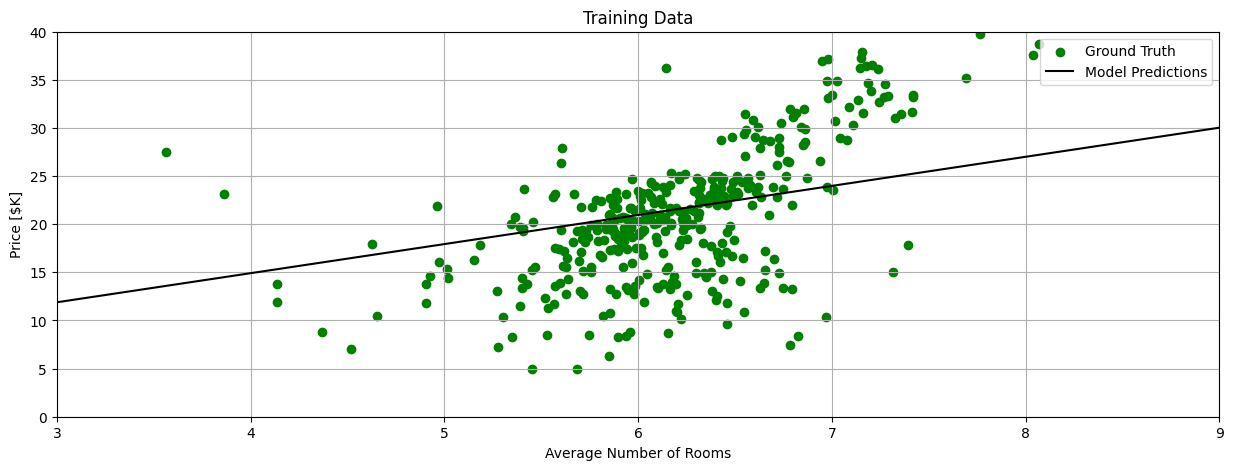

In [55]:
plot_data(X_train_1D, y_train, x, y, title = 'Training Data')

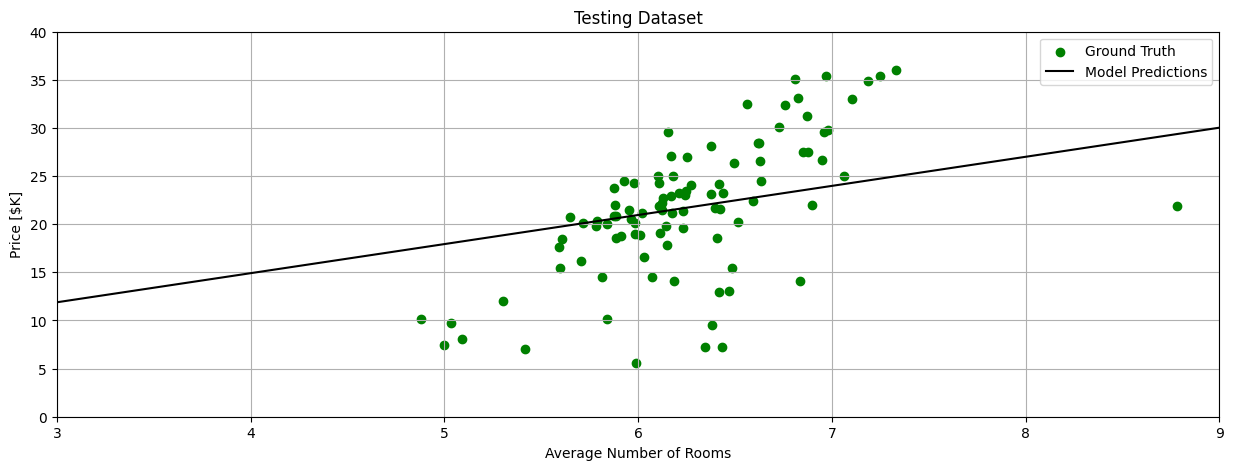

In [57]:
plot_data(X_test_1D, y_test, x, y, title = 'Testing Dataset')